In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def normalize(X):
    mean = np.mean(X)
    std = np.std(X)
    X = (X - mean)/std
    return X

In [4]:
# Data
boston = tf.contrib.learn.datasets.load_dataset('boston')
X_train, Y_train = boston.data[:,5], boston.target
#X_train = normalize(X_train)
n_samples = len(X_train)
#print(X_train)

In [5]:
# Placeholder for the Training Data
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Variables for coefficients initialized to 0
b = tf.Variable(0.0)
w = tf.Variable(0.0)

In [6]:
# The Linear Regression Model
Y_hat = X * w + b

# Loss function
loss = tf.square(Y - Y_hat, name='loss')

# Gradient Descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

In [7]:
# Initializing Variables
init_op = tf.global_variables_initializer()
total = []

In [8]:
# Computation Graph
with tf.Session() as sess:
    # Initialize variables
    sess.run(init_op)
    writer = tf.summary.FileWriter('graphs', sess.graph)

    # train the model for 100 epcohs
    for i in range(100):
        total_loss = 0
        for x,y in zip(X_train,Y_train):
            _, l = sess.run ([optimizer, loss], feed_dict={X:x, Y:y})
            total_loss += l

        total.append(total_loss / n_samples)
        print('Epoch {0}: Loss {1}'.format(i, total_loss/n_samples))

    writer.close()
    b_value, w_value = sess.run([b, w])

Epoch 0: Loss 26.779895120142466
Epoch 1: Loss 25.532963559892984
Epoch 2: Loss 25.308105514786394
Epoch 3: Loss 25.10842958027482
Epoch 4: Loss 24.930981125067394
Epoch 5: Loss 24.773168119782166
Epoch 6: Loss 24.63269657542246
Epoch 7: Loss 24.507561973939524
Epoch 8: Loss 24.395995892890088
Epoch 9: Loss 24.296436210372303
Epoch 10: Loss 24.207509442804618
Epoch 11: Loss 24.12800798017121
Epoch 12: Loss 24.05685957382555
Epoch 13: Loss 23.993130210483717
Epoch 14: Loss 23.93598476036447
Epoch 15: Loss 23.88469580368127
Epoch 16: Loss 23.838609592460674
Epoch 17: Loss 23.79715412149717
Epoch 18: Loss 23.759826562716107
Epoch 19: Loss 23.72617975498383
Epoch 20: Loss 23.695819259177686
Epoch 21: Loss 23.668390857997256
Epoch 22: Loss 23.643586170807783
Epoch 23: Loss 23.621129276800527
Epoch 24: Loss 23.600774940486847
Epoch 25: Loss 23.5823057752245
Epoch 26: Loss 23.56553128231661
Epoch 27: Loss 23.550277626216015
Epoch 28: Loss 23.53639167287385
Epoch 29: Loss 23.52373552081982
Epo

Done


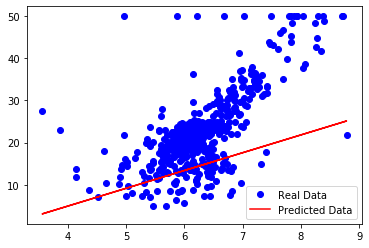

In [9]:
Y_pred = X_train * w_value + b_value
print('Done')
# Plot the result
plt.plot(X_train, Y_train, 'bo', label='Real Data')
plt.plot(X_train,Y_pred,  'r', label='Predicted Data')
plt.legend()
plt.show()

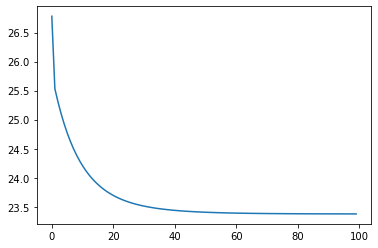

In [10]:
plt.plot(total)
plt.show()